# Muestreo reversible de saltos

In [5]:
from matplotlib import*
from pylab import*
from scipy import*
from numpy.random import*
%matplotlib inline
import numpy.random 
import scipy.stats as stat
pylab.rcParams['figure.figsize'] = (10.5, 6.5)
from scipy import stats
import matplotlib.pyplot

A continuación vamos a leer y graficar los datos que nos fue proporcionado.

In [3]:
fileData=open("data.txt",'r')
xcor=[]
ycor=[]
for line in fileData.readlines():
    xcor.append(line.split()[0])
    ycor.append(line.split()[1])
n=len(xcor)
x=[float(xcor[i]) for i in range(len(xcor))]
y=[float(ycor[i]) for i in range(len(ycor))]    

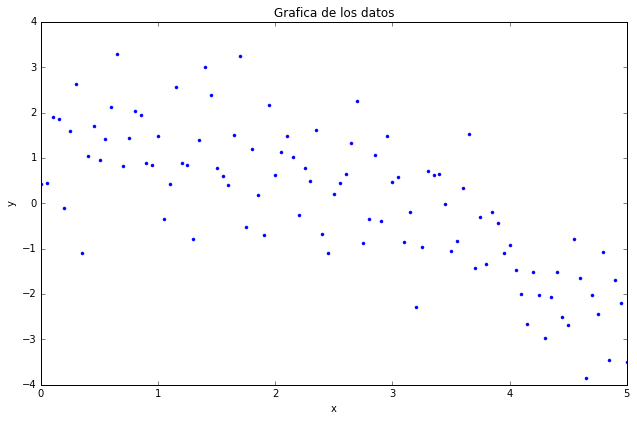

In [6]:
title("Grafica de los datos")
xlabel("x")
ylabel("y")
plot(xcor,ycor,".")
show()

In [7]:
def evalDensity(vec):
    gm=0
    if(len(vec)==1):
        gm = stat.norm.pdf(vec,0,2)[0]
    else:
        gm = stat.multivariate_normal.pdf(vec,zeros(len(vec)), 2*identity(len(vec)))
    return gm

In [8]:
def sumaInt(b,x):
    suma=0
    for i in range(len(b)):
        suma+=b[i]*x**(i)
    return suma 

def sumExt(x,y,b,n):
    suma=0
    for i in range(0,n,1):
        suma+=(y[i]-sumaInt(b,x[i]))**2
    coc=double(exp(-0.5*suma))
    return coc
    


In [9]:
m_0=0
b_0=uniform(0,1,1)
b_0=[b_0[i] for i in range(len(b_0))]
#dim=m_t[0]+1

In [10]:
m=[]
b=[]
m.append(m_0)
b.append(b_0)
t=1
while(t<=10e4):
    m_t=choice(3, 1, replace=False)[0]
    dim=m_t+1
    beta=0
    if(dim==1):
        beta=normal(zeros(dim),identity(dim),1)[0]
        beta=[beta]   
    elif(dim>=2):
        beta=multivariate_normal(zeros(dim),identity(dim),1).T    
        beta=[beta[i][0] for i in range(len(beta))]
    coc=evalDensity(beta)/evalDensity(b[t-1])
    coc1=double(sumExt(x,y,beta,n))/double(sumExt(x,y,b[t-1],n))
    coc2=coc*coc1
    u=uniform(0,1,1)
    if(u<=min(1,coc2)):
        m.append(m_t)
        b.append(beta)  
    else:
        m.append(m[t-1])
        b.append(b[t-1])
    t=t+1 

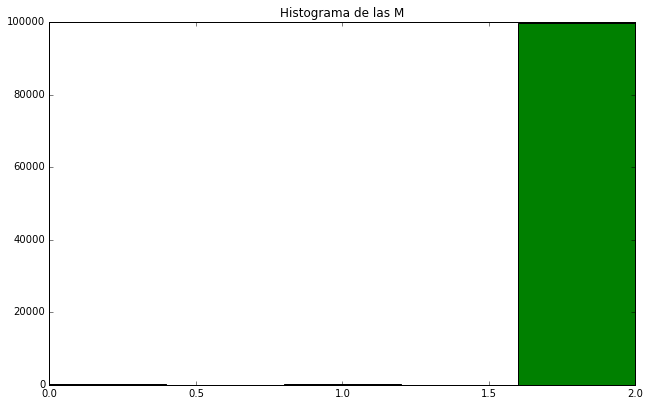

In [11]:
num_bins=5
title("Histograma de las M")
hist(m,num_bins, facecolor='green')
show()

### Modelo constante, lineal, cuadratico 

In [47]:
vde0=[]
vde1=[]
for i in range (len(b)):
    if(len(b[i])==2):
        vde0.append(b[i][0])
        vde1.append(b[i][1])


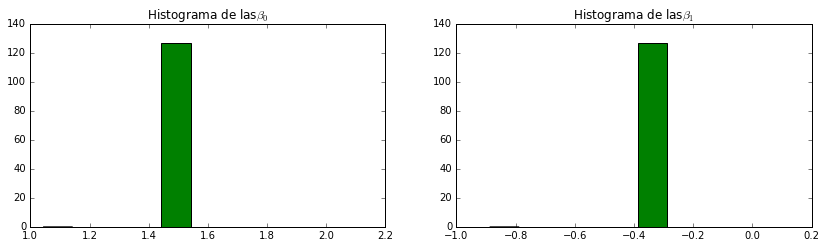

In [45]:
pylab.rcParams['figure.figsize'] = (14, 8)
num_bins=10
subplot(221)
title("Histograma de las" r'$\beta_0$')
hist(vde0,num_bins, facecolor='green')
subplot(222)
title("Histograma de las" r'$\beta_1$')
hist(vde1,num_bins, facecolor='green')
show()


In [46]:
vd0=stats.describe(vde0)[2]
vd1=stats.describe(vde1)[2]
print "los coeficientes de modelo son"
print vd0
print vd1

los coeficientes de modelo son
1.54319511919
-0.387743365655


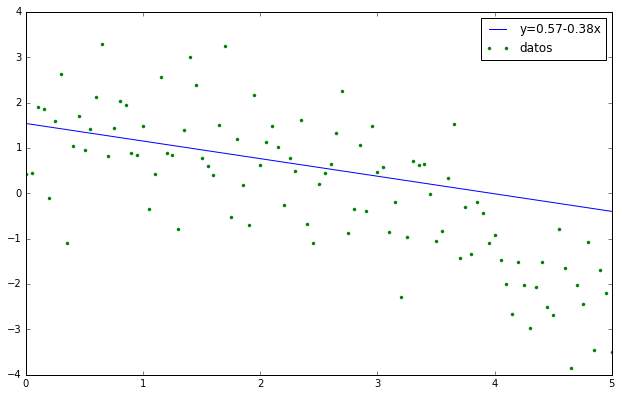

In [35]:
def ajuste0(x):
    return vd0+vd1*x

xv=linspace(0,5,100)
yv=ajuste0(xval)
plot(xv,yv,label="y=1.54-0.38x")
plot(xcor,ycor,".",label="datos")
legend()

In [48]:
b0=[]
b1=[]
b2=[]
for i in range (len(b)):
    if(len(b[i])==3):
        b0.append(b[i][0])
        b1.append(b[i][1])
        b2.append(b[i][2])

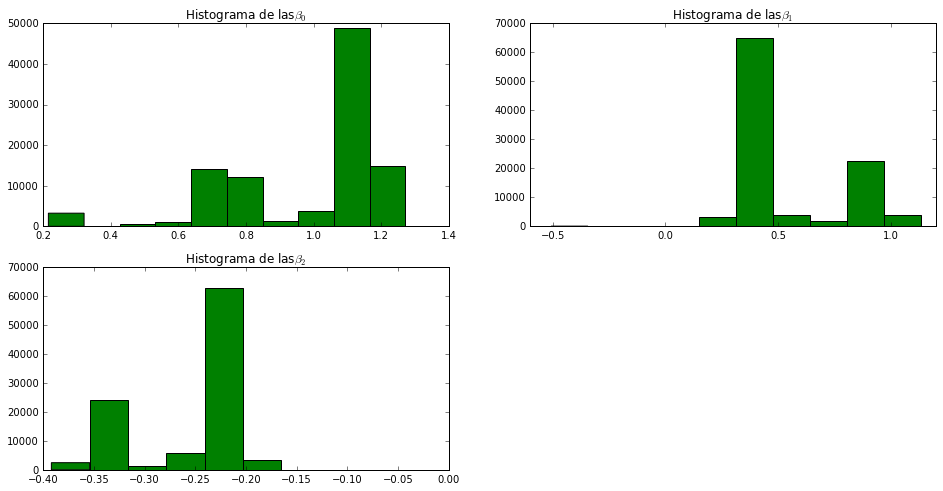

In [49]:
pylab.rcParams['figure.figsize'] = (16, 8)
num_bins=10
subplot(221)
title("Histograma de las" r'$\beta_0$')
hist(b0,num_bins, facecolor='green')
subplot(222)
title("Histograma de las" r'$\beta_1$')
hist(b1,num_bins, facecolor='green')
subplot(223)
title("Histograma de las" r'$\beta_2$')
hist(b2,num_bins, facecolor='green')
show()

In [50]:
beta0=stats.describe(b0)[2]
beta1=stats.describe(b1)[2]
beta2=stats.describe(b2)[2]
print "y="+str(beta0)+"x +"+str(beta1)+" x^2 "+str(beta2)+"x^3 "

y=0.974149846777x +0.540425673661 x^2 -0.264962835344x^3 


### Modelo que ajusta a los datos 

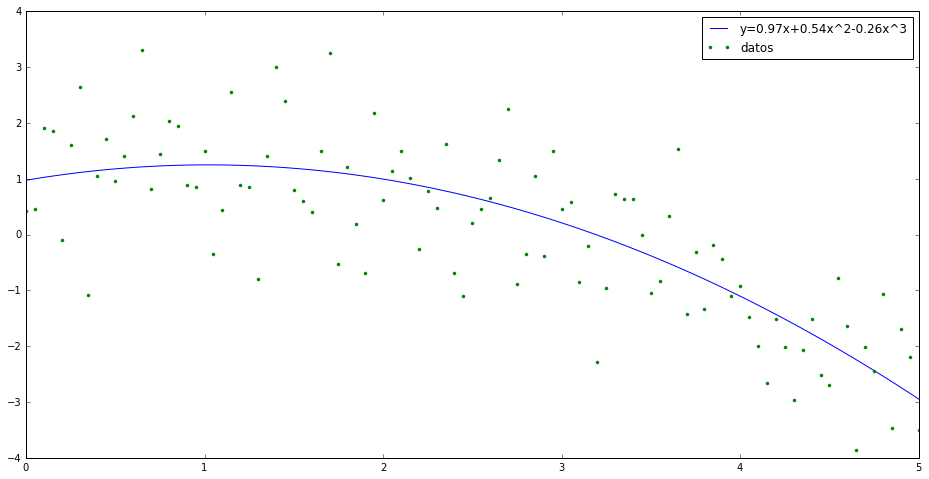

In [51]:
def ajuste(x):
    return beta0+beta1*x+beta2*x**2

xval=linspace(0,5,100)
yval=ajuste(xval)
plot(xval,yval,label="y=0.97x+0.54x^2-0.26x^3")
plot(xcor,ycor,".", label="datos")
legend()

### Conclusiones 